     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Naive Bayes Accuracy: 0.9827709978463748
Decision Tree Accuracy: 0.9626704953338119
Random Forest Accuracy: 0.9748743718592965


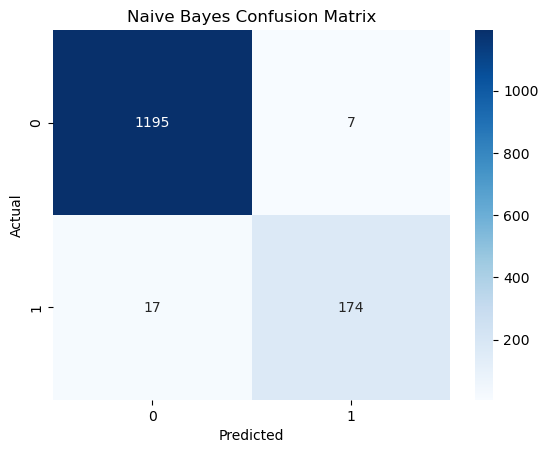

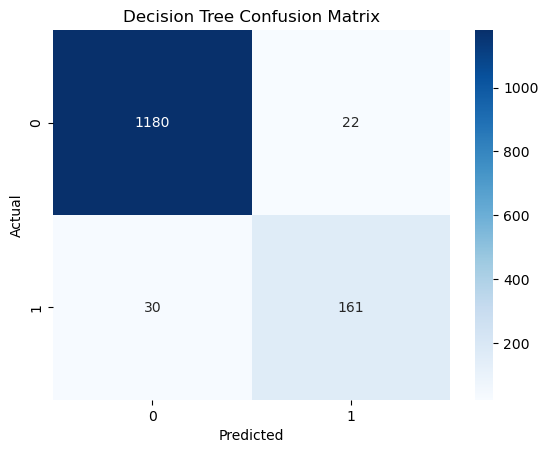

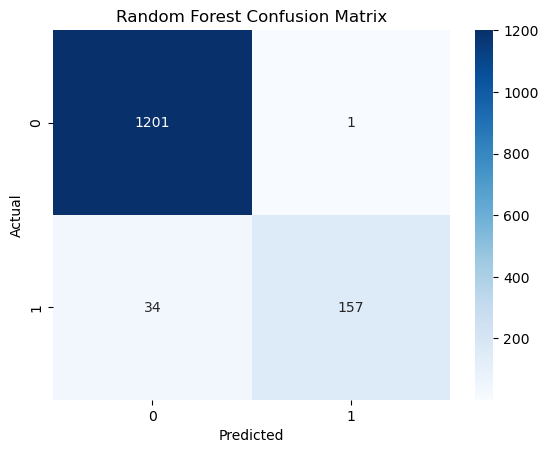

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, specifying the encoding of the file
data = pd.read_csv('spam.csv', encoding='utf-8')

# Print the first few rows of the data
print(data.head())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.25, random_state=42)

# Create a count vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vec, y_train)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vec, y_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)

# Make predictions on the test data for each classifier
y_pred_nb = nb_classifier.predict(X_test_vec)
y_pred_dt = dt_classifier.predict(X_test_vec)
y_pred_rf = rf_classifier.predict(X_test_vec)

# Calculate the accuracy of each classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of each classifier
print('Naive Bayes Accuracy:', accuracy_nb)
print('Decision Tree Accuracy:', accuracy_dt)
print('Random Forest Accuracy:', accuracy_rf)

# Generate and display the confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Generate and display the confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Generate and display the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()